# Recognizing dogs and cats pictures using Keras

The pictures used to train the network are publicly available by microsoft at: https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

### Reading and resizing data

First let's read the images from our directory and plot the first one to see if it works

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATA_DIR = "" # Use this variable to specify a another dir than app root.
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATA_DIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

<Figure size 640x480 with 1 Axes>

If you analyze the images you will see that some images are in landscape and some are portraits. Their sizes are differents too. Some are 500 x 400 others 500 x 450 and so on. So we need to normalize it

Let's resize our images to a 70x70 array and see if it's good

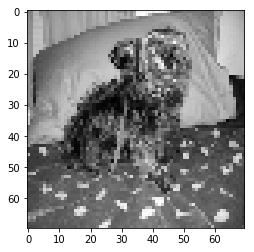

In [13]:
IMG_SIZE = 70
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

Ok it's look good! We can say if it's a dog or not.

Now let's define a function to create our training data. This function should read all the images like the test above and store it into an array with the 70x70 size

We're going to store the classification for the image too using the CATEGORIES index. 0 for dogs and 1 for cats

In [11]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATA_DIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        
create_training_data()

In [12]:
print(len(training_data))

24946


Let's shuffle our training_data array because all the dog pictures are the first half of our array and the cat pictures are the second half. So we have to shuffle it otherwise the network will receive just dog images and then just cat images and it's not good for training

In [13]:
import random

random.shuffle(training_data)

In [14]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
1
0
0
1
0
1
1


We create a X and y variables to store our features and the classification. Then we must reshape de features array so we can use it in keras.

In [15]:
X = []
y = []

In [16]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

Let's use pickle library to save our X and y variables into files so we can read them with all the resizing and classification done. It's easier when you have to reopen the notebook and don't have to read all the images again.

In [3]:
import pickle

In [17]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

So when we want to read X and y quickly we can read as below

In [4]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

### Training the model